In [39]:
import cartopy
import cartopy.io.shapereader as shpreader
import cartopy.crs as ccrs
import pandas as pd
import matplotlib.pyplot as plt
import pylab
from random import random
%matplotlib inline
pylab.rcParams['figure.figsize'] = (16.0, 9.0)
import warnings

In [224]:
def plot_map(country_list, property_to_plot, colormap='rainbow', min_value=0, max_value=1):
    def color_country(ax, color, country):
        ax.add_geometries(country.geometry, ccrs.PlateCarree(),
                            facecolor=color)
    cmap=plt.get_cmap(colormap)

    #def hack_colorbar(cmap, min_value, max_value):
    CS3 = plt.imshow([[min_value,0],[0,max_value]], cmap=cmap)
    plt.clf()

    with warnings.catch_warnings():
        warnings.simplefilter("ignore")
        ax = plt.axes(projection=cartopy.crs.Robinson())
    ax.add_feature(cartopy.feature.OCEAN)

    shpfilename = shpreader.natural_earth(resolution='110m', category='cultural', name='admin_0_countries')
    reader = shpreader.Reader(shpfilename)
    countries_on_map = reader.records()

    for country_on_map in countries_on_map:
        color = (1,1,1)
        for country_in_list in country_list:
            if country_on_map.attributes['iso_a3'] == country_in_list.iso:
                try:
                    color = cmap((country_in_list.properties[property_to_plot] - min_value)/(max_value - min_value))
                except KeyError as k:
                    print("No property", property_to_plot, "for country", country_in_list, ".")
        color_country(ax, color, country_on_map)
    plt.colorbar(CS3, orientation='horizontal', aspect=50)
    plt.show()

In [217]:
class Country():
    def __init__(self, iso):
        self.iso = iso
        self.properties = {}
    def __str__(self):
        return self.iso

In [218]:
temperature_data = pd.read_excel('/home/julian/Code/hpk-symposium/resources/cckp_historical_data_0.xls', 
                                 sheetname='Country_temperatureCRU')
iso = temperature_data['ISO_3DIGIT']
annual_mean_temperature = temperature_data['Annual_temp']
annual_mean_temperature.index = iso.values

In [219]:
countries = []
for iso in annual_mean_temperature.index:
    country = Country(iso)
    country.properties['temperature'] = annual_mean_temperature[iso]
    countries.append(country)

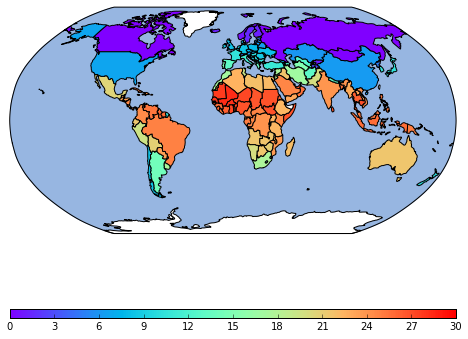

In [225]:
plot_map(countries, 'temperature', 'rainbow', min_value=0, max_value=30)

In [163]:
population_data = pd.read_csv('/home/julian/Code/hpk-symposium/resources/sp.pop.totl_Indicator_en_csv_v2.csv', header=2)
iso = population_data['Country Code']
population = population_data['2010']
population.index = iso

In [222]:
for country in countries:
    try:
        country.properties['population'] = population[country.iso]
    except KeyError as k:
        print("Don't know this country:", k)

Don't know this country: 'ESH'
Don't know this country: 'FLK'
Don't know this country: 'GLP'
Don't know this country: 'GUF'
Don't know this country: 'KSV'
Don't know this country: 'REU'
Don't know this country: 'SJM'


No property population for country FLK .
No property population for country ESH .


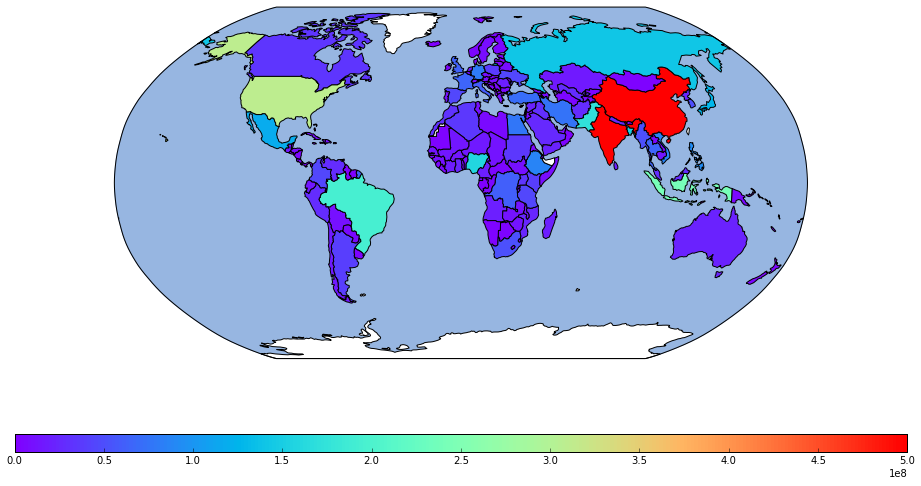

In [223]:
plot_map(countries, 'population', max_value=.5e+9)

In [215]:
plt.colorbar?